In [68]:
#1 Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
#2 Load Data

# Create Dataframe and Read CSV (NumPy)
df = pd.read_csv("./Data/Housing.csv")

In [70]:
#3 Clean Data

# Drop NaN values
clean_CSV = df.dropna()

In [71]:
#4.1 Summary Stats

# Find average stories
mean_stories = df['stories'].mean()
print(f"Mean Stories: {mean_stories.round(2)}")

# Find average area per stories
avg_area_per_stories = df.groupby('stories')['area'].mean().round(2)

# Clean up extra info from print()
avg_area_per_stories.index.name = None
avg_area_per_stories.name = None

print("Mean Stories Per Area:")
print(avg_area_per_stories.to_string()) # .to_string() removes the dtype: message at the end

Mean Stories: 1.81
Mean Stories Per Area:
1    5289.82
2    4756.95
3    5316.64
4    6506.17


In [72]:
#4.2 Correlation
# Closer to 1, postive. Closer to -1, negative. 
# Around 0, no relationship.

area_to_stories_correlation = df[['area','stories']].corr()

print(area_to_stories_correlation)

             area   stories
area     1.000000  0.083996
stories  0.083996  1.000000


In [73]:
#5 Filter and Extract

filtered_df = df[df["furnishingstatus"]=="furnished"] # Remove all unfurnished and semi-furnished

print(filtered_df.head(10))

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
8    9870000   8100         4          1        2      yes       yes      yes   
10   9800000  13200         3          1        2      yes        no      yes   
13   9240000   3500         4          2        2      yes        no       no   
17   8960000   8500         3          2        4      yes        no       no   
18   8890000   4600         3          2        2      yes       yes       no   
22   8645000   8050         3          1        1      yes       yes      yes   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
0               no             yes  

Average Price Per Stories:
1    4170658.59
2    4764073.53
3    5685435.90
4    7208449.76


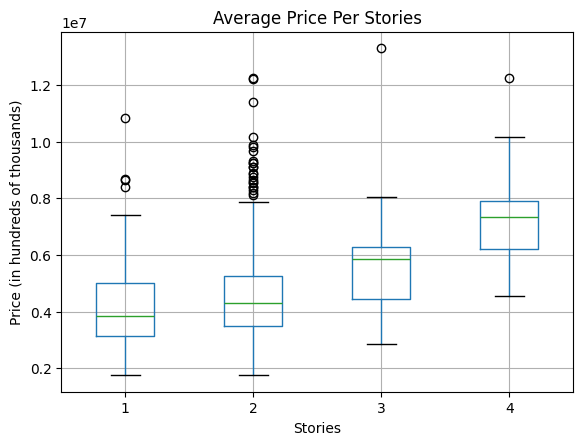

In [74]:
#6 Visualization (Matplotlib)

# Find average price depending on number of stories
avg_price_per_stories = df.groupby('stories')['price'].mean().round(2)

# Clean up extra info from print()
avg_price_per_stories.index.name = None
avg_price_per_stories.name = None

print("Average Price Per Stories:")
print(avg_price_per_stories.to_string())

df.boxplot(column='price', by='stories')
plt.title("Average Price Per Stories")
plt.suptitle("")
plt.xlabel("Stories")
plt.ylabel("Price (in hundreds of thousands)")
plt.show()